In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader

In [2]:
x = torch.linspace(-math.pi,math.pi,2000)
y = torch.sin(x)
print(x)

tensor([-3.1416, -3.1384, -3.1353,  ...,  3.1353,  3.1384,  3.1416])


In [3]:
x_train = x.reshape(-1,1)
y_train = torch.reshape(y,(-1,1))
print(x_train)
print(y_train)

tensor([[-3.1416],
        [-3.1384],
        [-3.1353],
        ...,
        [ 3.1353],
        [ 3.1384],
        [ 3.1416]])
tensor([[ 8.7423e-08],
        [-3.1430e-03],
        [-6.2863e-03],
        ...,
        [ 6.2863e-03],
        [ 3.1430e-03],
        [-8.7423e-08]])


In [4]:
class PolynomialDataset(Dataset):
    def __init__(self,x,y):
        self.x = x
        self.y = y
    
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self,idx):
        return self.x[idx],self.y[idx]
    

In [5]:
train_set = PolynomialDataset(x_train,y_train)
train_loader = DataLoader(train_set,batch_size=32,shuffle=True)

In [12]:
class SimpleANN(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,10)
        self.l2 = nn.Linear(10,5)
        self.l3 = nn.Linear(5,3)
        self.l4 = nn.Linear(3,1)
    
    def forward(self,x):
        h1 = self.l1(x)
        h2 = self.l2(F.relu(h1))
        h3 = self.l3(F.sigmoid(h2))
        h4 = self.l4(F.tanh(h3))

        return h4


SimpleANN(
  (l1): Linear(in_features=1, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=3, bias=True)
  (l4): Linear(in_features=3, out_features=1, bias=True)
)


In [17]:
model = SimpleANN()
print(model)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=(10e-2))
epochs = 100

SimpleANN(
  (l1): Linear(in_features=1, out_features=10, bias=True)
  (l2): Linear(in_features=10, out_features=5, bias=True)
  (l3): Linear(in_features=5, out_features=3, bias=True)
  (l4): Linear(in_features=3, out_features=1, bias=True)
)


In [18]:
losses = []
for epoch in range(epochs):
    for batch_idx, (inputs,targets) in enumerate(train_loader):
        optimizer.zero_grad()

        output = model(inputs)

        loss = criterion(targets,output)

        loss.backward()

        optimizer.step()

    print(f"Epoch {epoch + 1}/{100}, Batch {batch_idx + 1}/{len(train_loader)}, Loss: {loss.item():.4f}")        
    losses.append(loss.item())

Epoch 1/100, Batch 63/63, Loss: 0.4142
Epoch 2/100, Batch 63/63, Loss: 0.0934
Epoch 3/100, Batch 63/63, Loss: 0.0274
Epoch 4/100, Batch 63/63, Loss: 0.0510
Epoch 5/100, Batch 63/63, Loss: 0.0281
Epoch 6/100, Batch 63/63, Loss: 0.0467
Epoch 7/100, Batch 63/63, Loss: 0.0370
Epoch 8/100, Batch 63/63, Loss: 0.0510
Epoch 9/100, Batch 63/63, Loss: 0.0189
Epoch 10/100, Batch 63/63, Loss: 0.0224
Epoch 11/100, Batch 63/63, Loss: 0.0267
Epoch 12/100, Batch 63/63, Loss: 0.0207
Epoch 13/100, Batch 63/63, Loss: 0.0517
Epoch 14/100, Batch 63/63, Loss: 0.0204
Epoch 15/100, Batch 63/63, Loss: 0.0410
Epoch 16/100, Batch 63/63, Loss: 0.0196
Epoch 17/100, Batch 63/63, Loss: 0.0428
Epoch 18/100, Batch 63/63, Loss: 0.0466
Epoch 19/100, Batch 63/63, Loss: 0.0338
Epoch 20/100, Batch 63/63, Loss: 0.0386
Epoch 21/100, Batch 63/63, Loss: 0.0249
Epoch 22/100, Batch 63/63, Loss: 0.0558
Epoch 23/100, Batch 63/63, Loss: 0.0135
Epoch 24/100, Batch 63/63, Loss: 0.0267
Epoch 25/100, Batch 63/63, Loss: 0.0379
Epoch 26/

<class 'numpy.ndarray'>
(2000, 1) <class 'numpy.ndarray'>


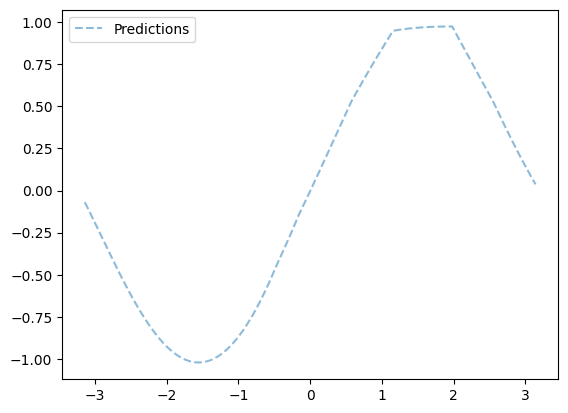

In [19]:
predicted = model(x_train).data.numpy()
print(type(predicted))
print(predicted.shape, type(predicted))

plt.clf()
#plt.plot(x_train, y_train, 'go', label='True data', alpha=0.5)
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)
plt.legend(loc='best')
plt.show()

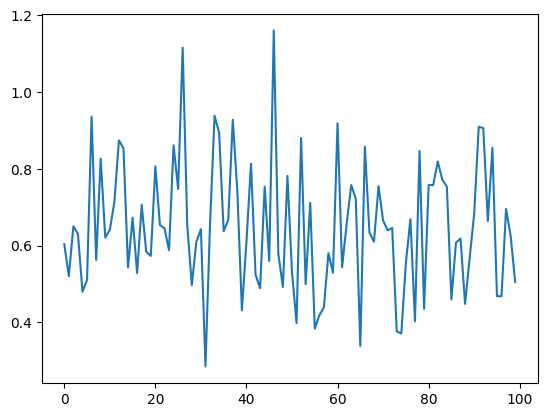

In [15]:
plt.plot(range(0,epochs),losses)

In [12]:
for param in model.parameters():
    print(param)

Parameter containing:
tensor([[ 0.3311],
        [-0.9770],
        [ 0.1436],
        [-1.1274],
        [ 0.2074],
        [ 0.5290],
        [-0.8925],
        [ 0.5937],
        [ 1.3344],
        [-0.8764]], requires_grad=True)
Parameter containing:
tensor([-0.1580,  0.1526, -0.7999, -0.5591,  0.6517,  0.8216, -0.1977,  1.1251,
         0.0728,  1.4844], requires_grad=True)
Parameter containing:
tensor([[ 0.1071, -0.5264, -0.2088, -0.5517,  0.2568,  0.0131, -0.5605, -0.5135,
          0.5751,  0.8624],
        [-0.1957,  0.4301, -0.1291,  0.0848, -0.4514,  0.0320,  0.5446,  0.2734,
         -0.3956, -0.4353],
        [-0.3523,  0.4611, -0.0193,  0.2842,  0.0446, -0.3035,  0.1344, -0.7175,
         -0.4383,  0.5548],
        [-0.1204, -0.2449, -0.3054, -0.5271,  0.4034,  0.0178, -0.2685, -0.0816,
         -0.4686, -0.8605],
        [ 0.1063,  0.2698,  0.2210,  0.3820, -0.1517, -0.4950,  0.4430, -0.7139,
         -0.6572,  0.2218]], requires_grad=True)
Parameter containing:
tensor([

In [13]:
for name,param in model.named_parameters():
    print(f"Parameter Name = {name} \n {param}")
    print(f"Parameter Values:")
    print(f"{param.data}")
    print("Gradient:")
    print(f"{param.grad}")
    print("-"*50)

Parameter Name = l1.weight 
 Parameter containing:
tensor([[ 0.3311],
        [-0.9770],
        [ 0.1436],
        [-1.1274],
        [ 0.2074],
        [ 0.5290],
        [-0.8925],
        [ 0.5937],
        [ 1.3344],
        [-0.8764]], requires_grad=True)
Parameter Values:
tensor([[ 0.3311],
        [-0.9770],
        [ 0.1436],
        [-1.1274],
        [ 0.2074],
        [ 0.5290],
        [-0.8925],
        [ 0.5937],
        [ 1.3344],
        [-0.8764]])
Gradient:
tensor([[-0.0186],
        [-0.0444],
        [ 0.0000],
        [-0.0301],
        [ 0.0213],
        [ 0.0030],
        [-0.0499],
        [ 0.0259],
        [-0.0697],
        [ 0.0402]])
--------------------------------------------------
Parameter Name = l1.bias 
 Parameter containing:
tensor([-0.1580,  0.1526, -0.7999, -0.5591,  0.6517,  0.8216, -0.1977,  1.1251,
         0.0728,  1.4844], requires_grad=True)
Parameter Values:
tensor([-0.1580,  0.1526, -0.7999, -0.5591,  0.6517,  0.8216, -0.1977,  1.1251,
   